In [18]:
import pandas as pd
from sentence_transformers import SentenceTransformer, util
import numpy as np
import matplotlib.pyplot as plt

In [19]:
search_sess = pd.read_json("../data/browser_sessions.json", lines = True)

## Import Search information from JSON File

In [20]:
import torch
torch.cuda.is_available()

True

In [21]:
search_sess.head()

,search_query,click_events,query_timestamp,sessionid
0,[water bottle],[20005571_C],[1631528381],5ef0c4fd-31ae-4b60-adc3-ee0cf645c812
1,"[eau de source, nutella, huile d’olive, chou f...","[20005571_C, 20436105_EA;20574189_EA, 20729461...","[1631756371, 1631756422, 1631756501, 1631756536]",50534a81-5abe-4b66-be56-c767ee28acfc
2,"[coffee crisp, coffee, kinder, beuno, salad, b...","[20019964_C, 20050931_EA, NO PRODUCT, NO PRODU...","[1631542818, 1631542869, 1631545955, 163154598...",0f10758d-f4c6-4ec4-9a86-08e353a9c221
3,"[water, canned drinks, soda, hot dog buns, hot...","[20022126_C, 20375155_C, 20306687003_C, 207799...","[1631721943, 1631721964, 1631722025, 163172207...",e60e1c97-a7fc-46d3-af58-cc2f3de4b2f9
4,"[eau, jus de canneberge]","[20022126_C, NO PRODUCT]","[1631736981, 1631736999]",bb672d6d-fddc-4a9e-a898-6bd3f4bc8e78


In [22]:
np.sum([len(i) for i in search_sess.search_query.to_list()])

679009

In [23]:
search_sess.shape

(57604, 4)

In [24]:
model = SentenceTransformer('distiluse-base-multilingual-cased-v2', device = 'cuda')

In [25]:
# df_features_reponse = pd.DataFrame({"current_search_query":[],"following_search_query":[],"did_click_result": []})
slen = search_sess.shape[0]
temp_list = []
for idx, row in search_sess.iterrows():
    n = len(row.search_query)
    for i in range(n-1):
        # print(row)
        # print(row.search_query[i])
        # print(row.search_query[i+1])
        # print(row.click_events[i])
        # print(f'{idx}/{slen }')
        if row.click_events[i] == 'NO PRODUCT':
            clicks = 1
        else:
            clicks = 0

        # print(clicks)
        # temp_df = pd.DataFrame({"current_search_query":[row.search_query[i]],"following_search_query":[row.search_query[i+1]],"did_click_result": [clickLen]})
        temp_entry = [row.search_query[i],row.search_query[i+1], clicks]
        temp_list.append(temp_entry)
df_features_reponse =  pd.DataFrame(temp_list,columns=["current_search_query","following_search_query","did_not_click_result"])


In [26]:
df_features_reponse.did_not_click_result.value_counts()

0    401803
1    219602
Name: did_not_click_result, dtype: int64

In [27]:
df_features_reponse['query Sim1'] = -99
df_features_reponse['query Sim2'] = -99

In [28]:
df_features_reponse.head()

,current_search_query,following_search_query,did_not_click_result,query Sim1,query Sim2
0,eau de source,nutella,0,-99,-99
1,nutella,huile d’olive,0,-99,-99
2,huile d’olive,chou fleur,0,-99,-99
3,coffee crisp,coffee,0,-99,-99
4,coffee,kinder,0,-99,-99


In [29]:
totslen = df_features_reponse.shape[0]
totslen

621405

In [30]:
search_sess

,search_query,click_events,query_timestamp,sessionid
0,[water bottle],[20005571_C],[1631528381],5ef0c4fd-31ae-4b60-adc3-ee0cf645c812
1,"[eau de source, nutella, huile d’olive, chou f...","[20005571_C, 20436105_EA;20574189_EA, 20729461...","[1631756371, 1631756422, 1631756501, 1631756536]",50534a81-5abe-4b66-be56-c767ee28acfc
2,"[coffee crisp, coffee, kinder, beuno, salad, b...","[20019964_C, 20050931_EA, NO PRODUCT, NO PRODU...","[1631542818, 1631542869, 1631545955, 163154598...",0f10758d-f4c6-4ec4-9a86-08e353a9c221
3,"[water, canned drinks, soda, hot dog buns, hot...","[20022126_C, 20375155_C, 20306687003_C, 207799...","[1631721943, 1631721964, 1631722025, 163172207...",e60e1c97-a7fc-46d3-af58-cc2f3de4b2f9
4,"[eau, jus de canneberge]","[20022126_C, NO PRODUCT]","[1631736981, 1631736999]",bb672d6d-fddc-4a9e-a898-6bd3f4bc8e78
...,...,...,...,...
57599,"[gluten free, lactose free, dairy free, tempeh...",[21245347_EA;21243173_EA;21079476_EA;20704235_...,"[1631572286, 1631573024, 1631573192, 163164885...",d9c7e703-ef48-4a23-9968-a29503d1b4f0
57600,"[organic vegetables, organic meat, organic chi...",[20600792001_EA;20146331001_EA;20139509001_KG;...,"[1631729832, 1631730291, 1631730330, 163173035...",b3566acb-8190-4a1b-a222-31ddefc535a5
57601,"[candy, full throttle, monster]",[21093710_EA;21210258_EA;20300862009_EA;203008...,"[1631714683, 1631715839, 1631715859]",dfe73c1c-bc7d-48fc-87f0-2b2cd70d7137
57602,"[dessert, popsicles, stuffed animals, squish m...",[20048223001_EA;20823700_EA;20307001004_EA;212...,"[1631671144, 1631671348, 1631671424, 163167166...",38640e1b-b364-413c-9d30-f166c881203f


In [31]:
print(f'{int(search_sess.iloc[1].query_timestamp[0])}  {int(search_sess.iloc[1].query_timestamp[1])}')
int(search_sess.iloc[1].query_timestamp[1]) - int(search_sess.iloc[1].query_timestamp[0])

1631756371  1631756422


51

In [32]:
# slen = search_sess.shape[0]
temp_list = []
for idx, row in search_sess.iterrows():
    n = len(row.search_query)
    for i in range(n-1):
        # print(row)
        # print(row.search_query[i])
        #print(row.search_query[i+1])
        #print(row.click_events[i])
        #print(f'{idx}/{slen }')
        timeBetweenQueries = int(row.query_timestamp[i+1])	- int(row.query_timestamp[i])
        # if row.click_events[i] == 'NO PRODUCT':
        #     clicks = 1
        # else:
        #     clicks = 0

        # print(clicks)
        # temp_df = pd.DataFrame({"current_search_query":[row.search_query[i]],"following_search_query":[row.search_query[i+1]],"did_click_result": [clickLen]})
        # temp_entry = [row.search_query[i],row.search_query[i+1], clicks]
        temp_list.append(timeBetweenQueries)
df_features_reponse['inter_query_time'] = temp_list

## Encode initial Similarities so we can look at relationship with Abandonments and inter query delta time.

We will use 3 different encodings, one multilingual as there is french in the dataset and also a general purpose english sentence transformer

In [33]:
sims = []
totslen = df_features_reponse.shape[0]
init_query_embed = model.encode(df_features_reponse.current_search_query,show_progress_bar = True)
print("sec_encode")
second_query_embed = model.encode(df_features_reponse.following_search_query,show_progress_bar = True)
print("moving on to dot prods")

for idx in  range(len(second_query_embed)):
    sims.append(util.dot_score( init_query_embed[idx],  second_query_embed[idx]	)[0].tolist()[0])
    if idx %1000 ==0:     print(f'{idx} / {totslen}')
sims
# util.dot_score( init_query_embed,  second_query_embed ).tolist()
#     sims.append(
#     # print(util.cos_sim(row.current_search_query, [row.following_search_query]	)[0][0])
#     print(f'{idx} / {totslen}')

df_features_reponse['query Sim1'	] = sims
df_features_reponse
sims

Batches:   0%|          | 0/19419 [00:00<?, ?it/s]

sec_encode


Batches:   0%|          | 0/19419 [00:00<?, ?it/s]

moving on to dot prods
0 / 621405
1000 / 621405
2000 / 621405
3000 / 621405
4000 / 621405
5000 / 621405
6000 / 621405
7000 / 621405
8000 / 621405
9000 / 621405
10000 / 621405
11000 / 621405
12000 / 621405
13000 / 621405
14000 / 621405
15000 / 621405
16000 / 621405
17000 / 621405
18000 / 621405
19000 / 621405
20000 / 621405
21000 / 621405
22000 / 621405
23000 / 621405
24000 / 621405
25000 / 621405
26000 / 621405
27000 / 621405
28000 / 621405
29000 / 621405
30000 / 621405
31000 / 621405
32000 / 621405
33000 / 621405
34000 / 621405
35000 / 621405
36000 / 621405
37000 / 621405
38000 / 621405
39000 / 621405
40000 / 621405
41000 / 621405
42000 / 621405
43000 / 621405
44000 / 621405
45000 / 621405
46000 / 621405
47000 / 621405
48000 / 621405
49000 / 621405
50000 / 621405
51000 / 621405
52000 / 621405
53000 / 621405
54000 / 621405
55000 / 621405
56000 / 621405
57000 / 621405
58000 / 621405
59000 / 621405
60000 / 621405
61000 / 621405
62000 / 621405
63000 / 621405
64000 / 621405
65000 / 621405


[0.1390582025051117,
 0.12753826379776,
 0.17621423304080963,
 0.7283122539520264,
 0.30817562341690063,
 0.3153964877128601,
 0.28971996903419495,
 0.3993818461894989,
 0.43277508020401,
 0.48197755217552185,
 0.22184798121452332,
 0.7607561945915222,
 0.29756227135658264,
 0.6535727381706238,
 0.49373072385787964,
 0.7364053130149841,
 0.6149380207061768,
 0.4437999129295349,
 0.3580571115016937,
 0.4880298674106598,
 0.4229394495487213,
 0.5456160306930542,
 0.639180064201355,
 0.7505742907524109,
 0.4677358567714691,
 0.43390607833862305,
 0.47407960891723633,
 0.8553370833396912,
 0.5277433395385742,
 0.40457674860954285,
 0.31643563508987427,
 0.45273759961128235,
 0.3529750108718872,
 0.6014458537101746,
 0.45692014694213867,
 0.2960476577281952,
 0.3444538116455078,
 0.6823163628578186,
 0.4475478231906891,
 0.10050615668296814,
 0.12453512847423553,
 0.7824166417121887,
 0.3160228729248047,
 0.23231393098831177,
 0.32011404633522034,
 0.3546682596206665,
 0.5900006890296936,
 

In [34]:
sims = []
model2 = SentenceTransformer('all-MiniLM-L6-v2', device = 'cuda')
# model2 = SentenceTransformer('all-MiniLM-L6-v2', device = 'cpu')
totslen = df_features_reponse.shape[0]
init_query_embed = model2.encode(df_features_reponse.current_search_query,show_progress_bar = True)
print("sec_encode")
second_query_embed = model2.encode(df_features_reponse.following_search_query,show_progress_bar = True)
print("moving on to dot prods")

for idx in  range(len(second_query_embed)):
    sims.append(util.dot_score( init_query_embed[idx],  second_query_embed[idx]	)[0].tolist()[0])
    if idx %1000 ==0:     print(f'{idx} / {totslen}')
sims
# util.dot_score( init_query_embed,  second_query_embed ).tolist()
#     sims.append(
#     # print(util.cos_sim(row.current_search_query, [row.following_search_query]	)[0][0])
#     print(f'{idx} / {totslen}')

df_features_reponse['query Sim2'	] = sims
df_features_reponse
sims


Batches:   0%|          | 0/19419 [00:00<?, ?it/s]

sec_encode


Batches:   0%|          | 0/19419 [00:00<?, ?it/s]

moving on to dot prods
0 / 621405
1000 / 621405
2000 / 621405
3000 / 621405
4000 / 621405
5000 / 621405
6000 / 621405
7000 / 621405
8000 / 621405
9000 / 621405
10000 / 621405
11000 / 621405
12000 / 621405
13000 / 621405
14000 / 621405
15000 / 621405
16000 / 621405
17000 / 621405
18000 / 621405
19000 / 621405
20000 / 621405
21000 / 621405
22000 / 621405
23000 / 621405
24000 / 621405
25000 / 621405
26000 / 621405
27000 / 621405
28000 / 621405
29000 / 621405
30000 / 621405
31000 / 621405
32000 / 621405
33000 / 621405
34000 / 621405
35000 / 621405
36000 / 621405
37000 / 621405
38000 / 621405
39000 / 621405
40000 / 621405
41000 / 621405
42000 / 621405
43000 / 621405
44000 / 621405
45000 / 621405
46000 / 621405
47000 / 621405
48000 / 621405
49000 / 621405
50000 / 621405
51000 / 621405
52000 / 621405
53000 / 621405
54000 / 621405
55000 / 621405
56000 / 621405
57000 / 621405
58000 / 621405
59000 / 621405
60000 / 621405
61000 / 621405
62000 / 621405
63000 / 621405
64000 / 621405
65000 / 621405


[0.06010209769010544,
 0.2796618640422821,
 0.29962876439094543,
 0.7058969140052795,
 0.21457435190677643,
 0.20045122504234314,
 0.16465488076210022,
 0.44436705112457275,
 0.4243902266025543,
 0.6477187275886536,
 0.20541027188301086,
 0.7049056887626648,
 0.37693384289741516,
 0.566501796245575,
 0.277784526348114,
 0.5670257806777954,
 0.5137931108474731,
 0.25795435905456543,
 0.2972102761268616,
 0.41301870346069336,
 0.39508241415023804,
 0.2754822075366974,
 0.35802707076072693,
 0.5806299448013306,
 0.29847967624664307,
 0.37493664026260376,
 0.41444164514541626,
 0.6820012331008911,
 0.5172191262245178,
 0.5414222478866577,
 0.45334798097610474,
 0.46873044967651367,
 0.204600989818573,
 0.46931192278862,
 0.39709532260894775,
 0.30175265669822693,
 0.2629024386405945,
 0.8382826447486877,
 0.18072545528411865,
 0.2578112483024597,
 0.3410411477088928,
 0.5716099739074707,
 0.2493067979812622,
 0.21355263888835907,
 0.20001094043254852,
 0.2800787687301636,
 0.34181687235832

In [35]:
sims = []
# model2 = SentenceTransformer('all-MiniLM-L6-v2', device = 'cuda')
# model2 = SentenceTransformer('all-MiniLM-L6-v2', device = 'cpu')
totslen = df_features_reponse.shape[0]
init_query_embed = model2.encode(df_features_reponse.current_search_query,show_progress_bar = True)
print("sec_encode")
second_query_embed = model2.encode(df_features_reponse.following_search_query,show_progress_bar = True)
print("moving on to dot prods")

for idx in  range(len(second_query_embed)):
    sims.append(util.cos_sim( init_query_embed[idx],  second_query_embed[idx]	)[0].tolist()[0])
    if idx %1000 ==0:     print(f'{idx} / {totslen}')
sims
# util.dot_score( init_query_embed,  second_query_embed ).tolist()
#     sims.append(
#     # print(util.cos_sim(row.current_search_query, [row.following_search_query]	)[0][0])
#     print(f'{idx} / {totslen}')

df_features_reponse['query Sim3'	] = sims
df_features_reponse
# sims

Batches:   0%|          | 0/19419 [00:00<?, ?it/s]

sec_encode


Batches:   0%|          | 0/19419 [00:00<?, ?it/s]

moving on to dot prods
0 / 621405
1000 / 621405
2000 / 621405
3000 / 621405
4000 / 621405
5000 / 621405
6000 / 621405
7000 / 621405
8000 / 621405
9000 / 621405
10000 / 621405
11000 / 621405
12000 / 621405
13000 / 621405
14000 / 621405
15000 / 621405
16000 / 621405
17000 / 621405
18000 / 621405
19000 / 621405
20000 / 621405
21000 / 621405
22000 / 621405
23000 / 621405
24000 / 621405
25000 / 621405
26000 / 621405
27000 / 621405
28000 / 621405
29000 / 621405
30000 / 621405
31000 / 621405
32000 / 621405
33000 / 621405
34000 / 621405
35000 / 621405
36000 / 621405
37000 / 621405
38000 / 621405
39000 / 621405
40000 / 621405
41000 / 621405
42000 / 621405
43000 / 621405
44000 / 621405
45000 / 621405
46000 / 621405
47000 / 621405
48000 / 621405
49000 / 621405
50000 / 621405
51000 / 621405
52000 / 621405
53000 / 621405
54000 / 621405
55000 / 621405
56000 / 621405
57000 / 621405
58000 / 621405
59000 / 621405
60000 / 621405
61000 / 621405
62000 / 621405
63000 / 621405
64000 / 621405
65000 / 621405


,current_search_query,following_search_query,did_not_click_result,query Sim1,query Sim2,inter_query_time,query Sim3
0,eau de source,nutella,0,0.139058,0.060102,51,0.060102
1,nutella,huile d’olive,0,0.127538,0.279662,79,0.279662
2,huile d’olive,chou fleur,0,0.176214,0.299629,35,0.299629
3,coffee crisp,coffee,0,0.728312,0.705897,51,0.705897
4,coffee,kinder,0,0.308176,0.214574,3086,0.214574
...,...,...,...,...,...,...,...
621400,caramel chocolate milkshake,chocolate milkshake,0,0.749199,0.882458,50,0.882458
621401,chocolate milkshake,milk to go,0,0.495846,0.544534,76,0.544534
621402,milk to go,drinks,0,0.421332,0.373735,164,0.373735
621403,drinks,apple sauce squeezy’s,0,0.228779,0.277448,233,0.277448


In [45]:
df_features_reponse.head()

,Unnamed: 0,current_search_query,following_search_query,did_not_click_result,query Sim1,query Sim2,inter_query_time,query Sim3,log_inter_query_time
0,0,eau de source,nutella,0,0.139058,0.060102,51,0.060102,3.931826
1,1,nutella,huile d’olive,0,0.127538,0.279662,79,0.279662,4.369448
2,2,huile d’olive,chou fleur,0,0.176214,0.299629,35,0.299629,3.555348
3,3,coffee crisp,coffee,0,0.728312,0.705897,51,0.705897,3.931826
4,4,coffee,kinder,0,0.308176,0.214574,3086,0.214574,8.034631


In [46]:
df_features_reponse.to_csv('../data/features.csv')

## Load in initial encodings and look at visualizations

In [47]:
df_features_reponse = pd.read_csv('../data/features.csv')
df_features_reponse.	current_search_query	.fillna('',inplace = True)
df_features_reponse.	following_search_query	.fillna('',inplace = True)

In [48]:
df_features_reponse[df_features_reponse['query Sim1'] >0.7]

,Unnamed: 0.1,Unnamed: 0,current_search_query,following_search_query,did_not_click_result,query Sim1,query Sim2,inter_query_time,query Sim3,log_inter_query_time
3,3,3,coffee crisp,coffee,0,0.728312,0.705897,51,0.705897,3.931826
11,11,11,hot dog buns,hot dogs,0,0.760756,0.704906,165,0.704906,5.105945
15,15,15,cheddar cheese,nacho cheese,0,0.736405,0.567026,22,0.567026,3.091042
23,23,23,onions,garlic,0,0.750574,0.580630,9,0.580630,2.197225
27,27,27,oranged,oranges,1,0.855337,0.682001,2,0.682001,0.693147
...,...,...,...,...,...,...,...,...,...,...
621382,621382,621382,cup cakes,cupcakes,0,0.801475,0.800724,95,0.800724,4.553877
621386,621386,621386,treetops,treets,1,0.839098,0.663765,16,0.663766,2.772589
621394,621394,621394,lollypops 100 packs,pops 100 pack,1,0.822089,0.744269,33,0.744269,3.496508
621400,621400,621400,caramel chocolate milkshake,chocolate milkshake,0,0.749199,0.882458,50,0.882458,3.912023


In [49]:
import seaborn as sns

<AxesSubplot: xlabel='did_not_click_result', ylabel='query Sim1'>

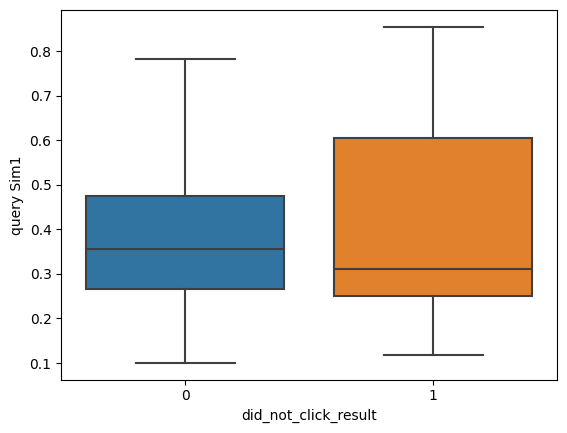

In [50]:
sns.boxplot(data = df_features_reponse.iloc[:100], x="did_not_click_result", y = "query Sim1")

<AxesSubplot: xlabel='query Sim1', ylabel='Probability'>

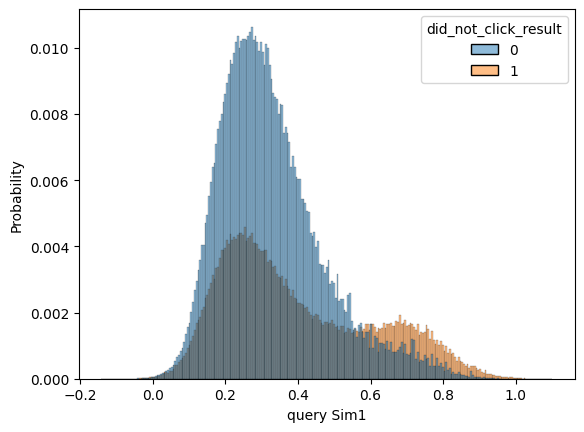

In [51]:
sns.histplot(data = df_features_reponse, x="query Sim1", hue = "did_not_click_result",stat="probability")

In [52]:
df_features_reponse['log_inter_query_time'] = np.log(df_features_reponse['inter_query_time'])

c:\Users\desk1\.conda\envs\SearchMatching\lib\site-packages\pandas\core\arraylike.py:402: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


<AxesSubplot: xlabel='query Sim1', ylabel='log_inter_query_time'>

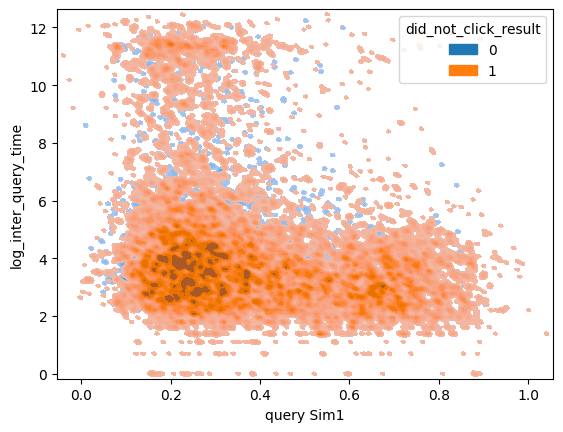

In [53]:
sns.kdeplot(
    data = df_features_reponse.iloc[:10000], x="query Sim1", y='log_inter_query_time', hue = "did_not_click_result", fill=True, bw_adjust = 0.1
)

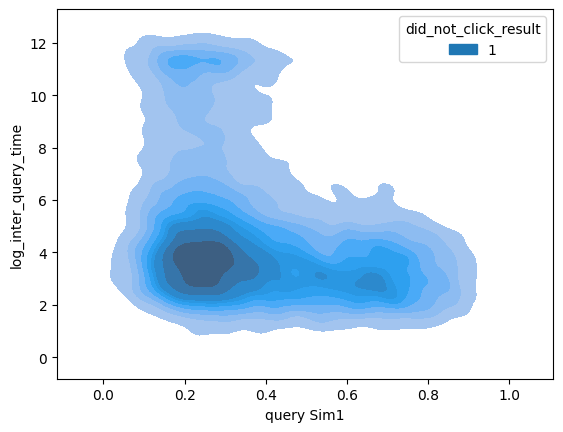

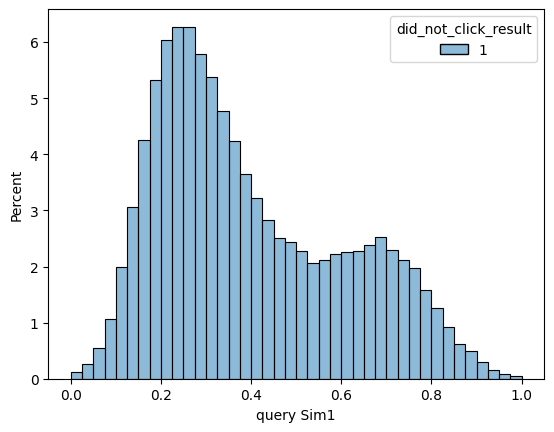

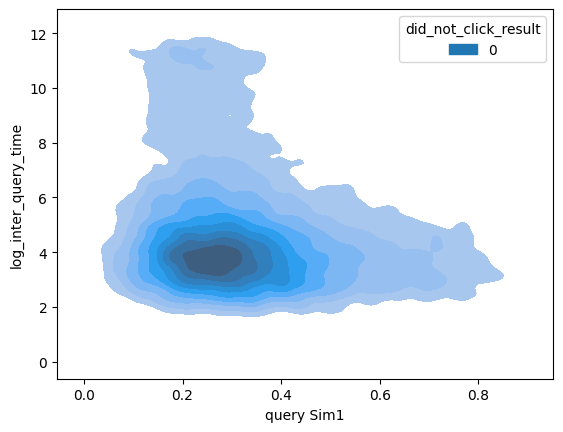

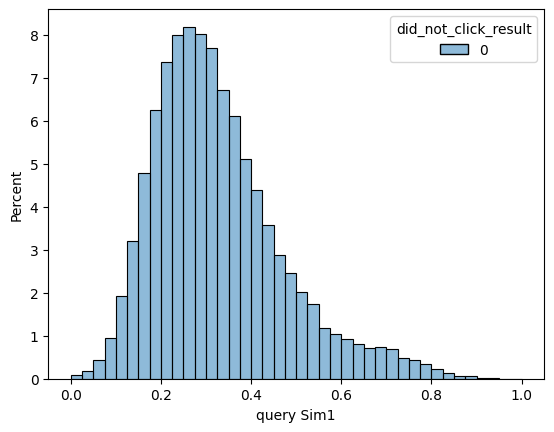

In [54]:
no_click = df_features_reponse[df_features_reponse.did_not_click_result ==1]
were_clicks = df_features_reponse[df_features_reponse.did_not_click_result !=1]
sns.kdeplot(
    data = no_click.iloc[:10000], x="query Sim1", y='log_inter_query_time', hue = "did_not_click_result", fill=True, bw_adjust = 0.5
)
plt.show()

sns.histplot(data = no_click, x="query Sim1", hue = "did_not_click_result",stat="percent",binrange=(0,1),bins = 40)

plt.show()

sns.kdeplot(
    data =were_clicks.iloc[:10000], x="query Sim1", y='log_inter_query_time', hue = "did_not_click_result", fill=True, bw_adjust = 0.5
)
plt.show()

sns.histplot(data = were_clicks, x="query Sim1", hue = "did_not_click_result",stat="percent",binrange=(0,1),bins = 40)

plt.show()

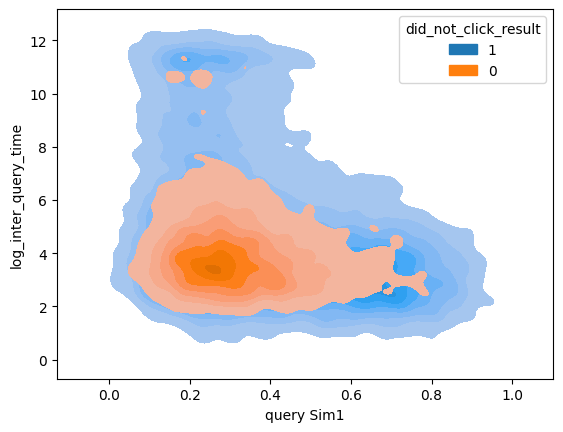

In [56]:
sns.kdeplot(
    data =df_features_reponse.iloc[:20000], x="query Sim1", y='log_inter_query_time', hue = "did_not_click_result",hue_order=[1,0], fill=True, bw_adjust = 0.5
)
plt.show()

In [57]:
df_features_reponse[(df_features_reponse.log_inter_query_time >4.5 )& (df_features_reponse.log_inter_query_time <5.5)]

,Unnamed: 0.1,Unnamed: 0,current_search_query,following_search_query,did_not_click_result,query Sim1,query Sim2,inter_query_time,query Sim3,log_inter_query_time
6,6,6,beuno,salad,1,0.289720,0.164655,109,0.164655,4.691348
11,11,11,hot dog buns,hot dogs,0,0.760756,0.704906,165,0.704906,5.105945
14,14,14,yogurt,cheddar cheese,0,0.493731,0.277785,144,0.277785,4.969813
32,32,32,juice,corn starch,0,0.352975,0.204601,174,0.204601,5.159055
80,80,80,dairy & eggs,hashbrowns,0,0.245044,0.098110,229,0.098110,5.433722
...,...,...,...,...,...,...,...,...,...,...
621382,621382,621382,cup cakes,cupcakes,0,0.801475,0.800724,95,0.800724,4.553877
621383,621383,621383,cupcakes,desert,0,0.285773,0.187970,116,0.187970,4.753590
621392,621392,621392,bear paws,lollypops,0,0.420039,0.211395,114,0.211395,4.736198
621402,621402,621402,milk to go,drinks,0,0.421332,0.373735,164,0.373735,5.099866


In [58]:
df_features_reponse[(df_features_reponse.log_inter_query_time >10.5 )& (df_features_reponse.log_inter_query_time <11.5)]

,Unnamed: 0.1,Unnamed: 0,current_search_query,following_search_query,did_not_click_result,query Sim1,query Sim2,inter_query_time,query Sim3,log_inter_query_time
248,248,248,arla cream cheese,natures path heritage flakes,1,0.079740,0.041195,77269,0.041195,11.255048
252,252,252,ladies underwear,baleine sea salt,1,0.175483,0.109086,76810,0.109086,11.249090
306,306,306,date squares,bacon,1,0.178152,0.012992,87264,0.012992,11.376693
314,314,314,chicken,parmesan & hard cheese,0,0.178278,0.214628,88529,0.214628,11.391085
316,316,316,hard cheese,salad,1,0.318553,0.388183,84676,0.388183,11.346587
...,...,...,...,...,...,...,...,...,...,...
620938,620938,620938,schneider,strawberries,0,0.318594,0.180509,92478,0.180509,11.434726
620982,620982,620982,pate,diced tomato,1,0.193834,0.268386,94140,0.268386,11.452538
621128,621128,621128,baby plates,bear paws,0,0.288255,0.178183,51561,0.178183,10.850521
621347,621347,621347,dairy free,tempeh,0,0.208314,0.230378,75661,0.230378,11.234018


## EDA Conclusions

We can see that there a much higher count of abondments (zero click searches) when the time between searches is low, in our case log interquery time is 0-5 range.
In the case where the query similarity is high and interquery time is low, generally this is more likely to be a no click event (above 0.5 similarity) This appears to be the search reformulation case.

Therefore to test our similarity model only query pairs that have a log inter query time below 5 will be used, with equates to around 2.5 minutes. Intuitively this also makes sense, as coming back after more than 2 minutes may just have been that the user got distracted or has began searching for other things. This would typically not indicate that the following search would be a reformulation of the original search.

In [59]:
onlyShortQueries = df_features_reponse[df_features_reponse.log_inter_query_time<5]

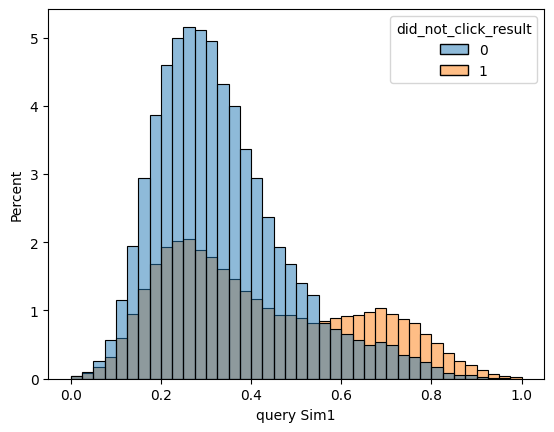

In [60]:
sns.histplot(data = onlyShortQueries, x="query Sim1", hue = "did_not_click_result",stat="percent",binrange=(0,1),bins = 40)

plt.show()

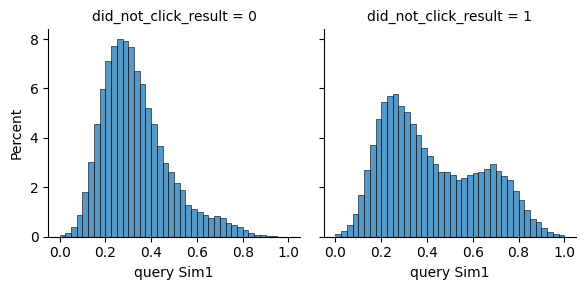

In [61]:
g = sns.FacetGrid(onlyShortQueries, col="did_not_click_result")
g.map (sns.histplot,"query Sim1", stat="percent",binrange=(0,1),bins = 40)


## Use a logistic regression model to set the threshold of similarity to maximise accruacy wrt no click/ abandonment events

In [62]:
from sklearn.linear_model import LogisticRegression

In [63]:
scoringList = ["f1_macro",'precision','recall']

In [64]:
X = onlyShortQueries[["query Sim1"]]
y = onlyShortQueries.did_not_click_result

# clf = LogisticRegressionCV(cv=5, random_state=0).fit(X, y)


In [65]:
from sklearn.model_selection import GridSearchCV
parameters = {'penalty':('l2', 'none')}
# clf = GridSearchCV(svc, parameters)
LR = LogisticRegression(random_state=0)
# clf.fit(X, y)
clf = GridSearchCV(estimator=LR,
             param_grid=parameters, scoring = scoringList,refit = "f1_macro")
clf.fit(X,y)
# sorted(clf.cv_results_.keys())

GridSearchCV(estimator=LogisticRegression(random_state=0),
             param_grid={'penalty': ('l2', 'none')}, refit='f1_macro',
             scoring=['f1_macro', 'precision', 'recall'])

In [66]:
print('multilingual performance')
print(clf.cv_results_ ['mean_test_f1_macro'] )
print(clf.cv_results_['mean_test_precision'] )
print(clf.cv_results_['mean_test_recall'] )

multilingual performance
[0.5841341  0.58416834]
[0.67776932 0.67771256]
[0.2558713  0.25594857]


In [67]:
clf.best_estimator_.coef_

array([[2.76115954]])

In [68]:
clf.best_estimator_.intercept_

array([-1.6315747])

So our equation is 
$0.5 = 1/ 1 +e^{-{(-1.63 + 2.76 T)}}$

$1 = 0.5+0.5e^{(1.63 - 2.76 T)}$

where T is our threshold of simularity

$1 = e^{(1.63-2.76T)}$


$Threshold = 0.590579$

## using MP english sentence transformer embeddings
compare with multilingual and pickle best model

In [69]:
onlyShortQueries = df_features_reponse[df_features_reponse.log_inter_query_time<5]

X = onlyShortQueries[["query Sim2"]]
y = onlyShortQueries.did_not_click_result

# clf = LogisticRegressionCV(cv=5, random_state=0).fit(X, y)


In [70]:
from sklearn.model_selection import GridSearchCV
parameters = {'penalty':('l2', 'none')}
# clf = GridSearchCV(svc, parameters)
LR = LogisticRegression(random_state=0)
# clf.fit(X, y)
clf = GridSearchCV(estimator=LR,
             param_grid=parameters , scoring = scoringList,refit = "f1_macro")
clf.fit(X,y)
# sorted(clf.cv_results_.keys())

GridSearchCV(estimator=LogisticRegression(random_state=0),
             param_grid={'penalty': ('l2', 'none')}, refit='f1_macro',
             scoring=['f1_macro', 'precision', 'recall'])

In [71]:
print('english all-MiniLM-L6-v2 dotprod sim performance')
print(clf.cv_results_ ['mean_test_f1_macro'] )
print(clf.cv_results_['mean_test_precision'] )
print(clf.cv_results_['mean_test_recall'] )

english all-MiniLM-L6-v2 dotprod sim performance
[0.67495784 0.67496633]
[0.73504324 0.73501495]
[0.41476563 0.41479874]


In [72]:
clf.best_params_

{'penalty': 'none'}

In [73]:
clf.best_estimator_.coef_

array([[3.54833595]])

In [74]:
clf.best_estimator_.intercept_

array([-1.99116671])

In [75]:
clf.best_estimator_.predict([[0.59]])

c:\Users\desk1\.conda\envs\SearchMatching\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array([1], dtype=int64)

In [76]:
# onlyShortQueries = df_features_reponse[df_features_reponse.log_inter_query_time<5]

X = onlyShortQueries[["query Sim3"]]
y = onlyShortQueries.did_not_click_result

# clf = LogisticRegressionCV(cv=5, random_state=0).fit(X, y)


In [77]:
from sklearn.model_selection import GridSearchCV
parameters = {'penalty':('l2', 'none')}
# clf = GridSearchCV(svc, parameters)
LR = LogisticRegression(random_state=0)
# clf.fit(X, y)
clf = GridSearchCV(estimator=LR,
             param_grid=parameters, scoring = scoringList,refit = "f1_macro")
clf.fit(X,y)
# sorted(clf.cv_results_.keys())

GridSearchCV(estimator=LogisticRegression(random_state=0),
             param_grid={'penalty': ('l2', 'none')}, refit='f1_macro',
             scoring=['f1_macro', 'precision', 'recall'])

In [78]:
print('english all-MiniLM-L6-v2 cos sim performance')
print(clf.cv_results_ ['mean_test_f1_macro'] )
print(clf.cv_results_['mean_test_precision'] )
print(clf.cv_results_['mean_test_recall'] )

english all-MiniLM-L6-v2 cos sim performance
[0.67495784 0.67496633]
[0.73504324 0.73501495]
[0.41476563 0.41479874]


In [79]:
import pickle

with open("../util/model.pkl", "wb") as f: 
    pickle.dump(clf.best_estimator_, f)

In [80]:
clf.best_params_

{'penalty': 'none'}

In [81]:
clf.best_estimator_.coef_

array([[3.54833567]])

In [82]:
clf.best_estimator_.intercept_

array([-1.99116669])

In [83]:
clf.best_estimator_

LogisticRegression(penalty='none', random_state=0)

In [84]:
clf.best_estimator_.predict([[0.59]])

c:\Users\desk1\.conda\envs\SearchMatching\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array([1], dtype=int64)